# <span style="color:cornflowerblue"><center> Numerical Simulation Laboratory</center></span>
## <span style="color:cornflowerblue"><center> Samuele Brambilla - Notebook 6</center></span>

In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

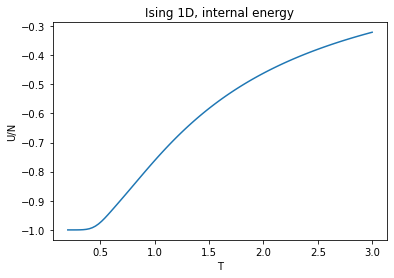

In [1]:
import numpy as np
import matplotlib.pyplot as plt
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e)
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.show()

$U/N$ è in unità di J, quindi se tende a -1 vuol dire che tutti gli spin sono allineati, come deve essere nello stato fondamentale

- the **Heat Capacity** (with $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

È un esempio del teorema di fluttuazione e dissipazione: i moti naturali dovuti a fluttuazioni sono svelati dal moto di risposta a un cambiamento che imponiamo (se il cambiamento è "docile") perchè il sistema risponde allo stesso modo.
C è una funzione di risposta: è dovuta al variare di U in funzione di T. In questo senso allora C è funzione delle fluttuazioni di H e la sua incertezza sono le fluttuazioni quadratiche
$$C(N,T) = k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right) $$

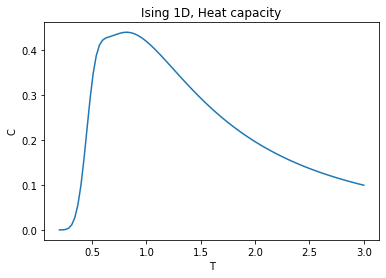

In [2]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat)
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.show()

- The **magnetization** (with $h \not= 0$):

Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

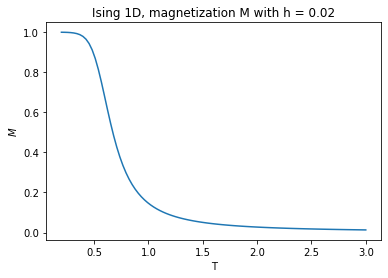

In [3]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M)
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.show()

- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

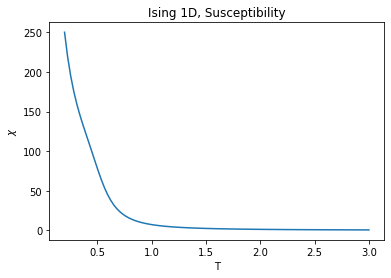

In [4]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X)
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.show()

Altro esempio del teorema di fluttuazione - disspazione (collego una risposta del sistema a una proprietà all'equilibrio): è come risponde il sistema a un cambiamento di un campo magnetico esterno.
Qui è plottata in maniera analitica, nel codice la calcoliamo come fluttuazione della magnetizzazione.

### Exercise 06.1

Complete the C++ code to simulate 1D Ising model (It is available on the Ariel web site of this Laboratory) with 
- the Metropolis sampling algorithm and
- the Gibbs sampling algorithm

to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$,
adding also the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$ -- non sottraiamo il quadrato dei valori medi perchè senza campo esterno sono nulli
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with both sampling methods, Metropolis and Gibbs.


A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## Equilibration

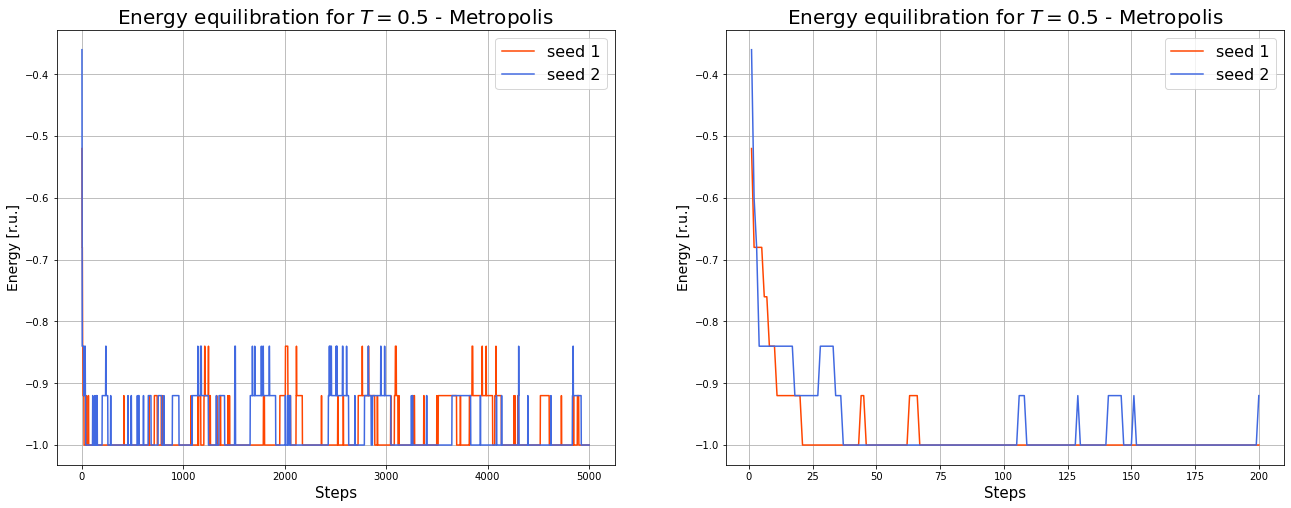

In [6]:
steps05, energy05 = np.loadtxt("equil_T05.dat", unpack=True, usecols=(0,1))
steps05s2, energy05s2 = np.loadtxt("equil_T05_primes2.dat", unpack=True, usecols=(0,1))

fig, ax  = plt.subplots(1, 2, figsize=(22 , 8))

ax[0].plot(steps05, energy05, color="orangered", label="seed 1")
ax[1].plot(steps05[0:200], energy05[0:200], color="orangered", label="seed 1")
ax[0].plot(steps05s2, energy05s2, color="royalblue", label="seed 2")
ax[1].plot(steps05s2[0:200], energy05s2[0:200], color="royalblue", label="seed 2")

for i in range(2):
    ax[i].set_title('Energy equilibration for $T = 0.5$ - Metropolis' , fontsize = 20)
    ax[i].set_ylabel('Energy [r.u.]', fontsize = 14)
    ax[i].set_xlabel('Steps', fontsize = 15)
    ax[i].legend(loc="best", prop={'size': 16})
    ax[i].grid(True)

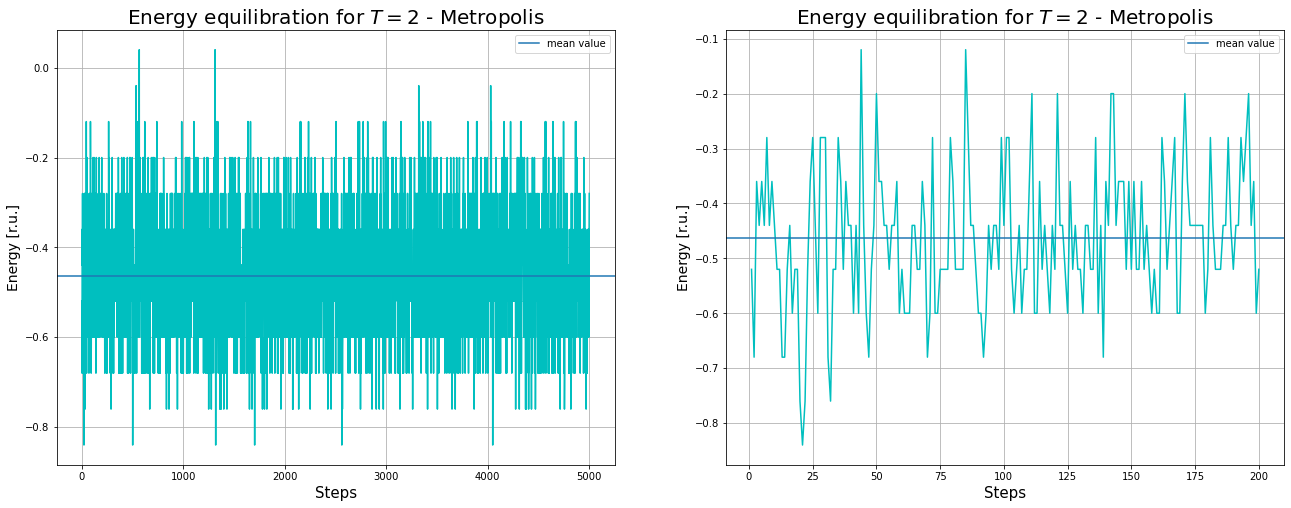

In [7]:
steps2, energy2 = np.loadtxt("equil_T2.dat", unpack=True, usecols=(0,1))
fig, ax  = plt.subplots(1, 2, figsize=(22 , 8))

ax[0].plot(steps2, energy2, color="c")
ax[1].plot(steps2[0:200], energy2[0:200], color="c")

for i in range(2):
    ax[i].set_title('Energy equilibration for $T = 2$ - Metropolis' , fontsize = 20)
    ax[i].set_ylabel('Energy [r.u.]', fontsize = 14)
    ax[i].set_xlabel('Steps', fontsize = 15)
    ax[i].axhline(np.mean(energy2), label="mean value")
    ax[i].legend()
    ax[i].grid(True)

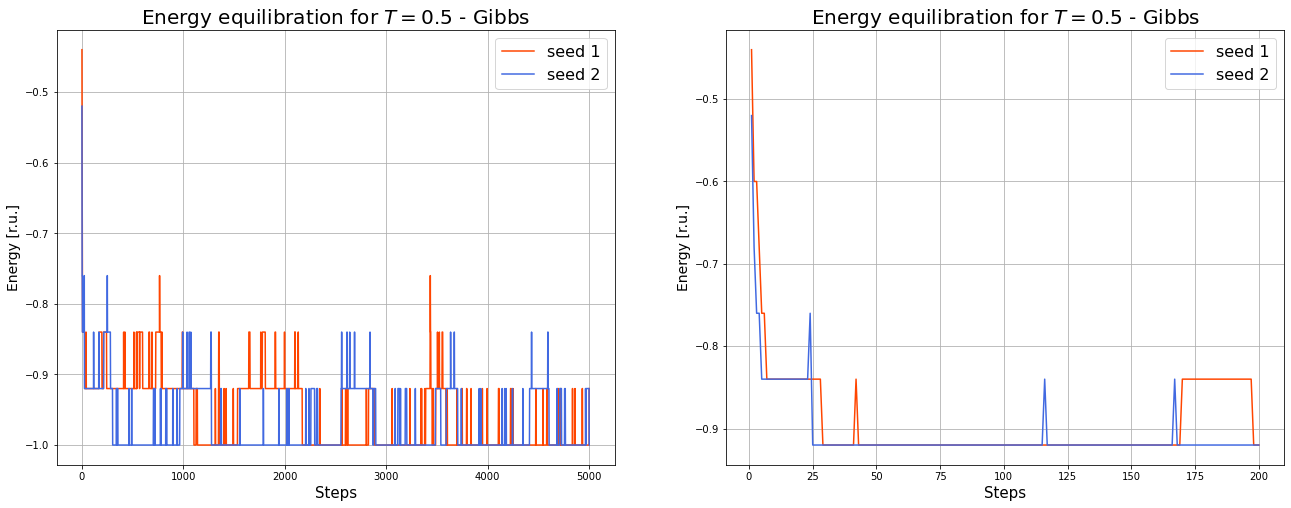

In [8]:
#Equilibrazione Gibbs
steps05, energy05 = np.loadtxt("gibbs_equil.dat", unpack=True, usecols=(0,1))
steps05s2, energy05s2 = np.loadtxt("gibbs_equil2.dat", unpack=True, usecols=(0,1))

fig, ax  = plt.subplots(1, 2, figsize=(22 , 8))

ax[0].plot(steps05, energy05, color="orangered", label="seed 1")
ax[1].plot(steps05[0:200], energy05[0:200], color="orangered", label="seed 1")
ax[0].plot(steps05s2, energy05s2, color="royalblue", label="seed 2")
ax[1].plot(steps05s2[0:200], energy05s2[0:200], color="royalblue", label="seed 2")

for i in range(2):
    ax[i].set_title('Energy equilibration for $T = 0.5$ - Gibbs' , fontsize = 20)
    ax[i].set_ylabel('Energy [r.u.]', fontsize = 14)
    ax[i].set_xlabel('Steps', fontsize = 15)
    ax[i].legend(loc="best", prop={'size': 16})
    ax[i].grid(True)

I grafici riportano l'andamento dell'energia interna per particella durante l'evoluzione del sistema del modello di Ising 1d utilizzando sia l'algoritmo di Metropolis (per $T = 0.5$ e $T = 2$ in unità ridotte) che quello di Gibbs (per $T = 0.5$). Ogni metodo è stato ripetuto due volte, fornendo un diverso seed al generatore di numeri casuali. <br>
L'andamento dell'energia interna per entrambi i metodi mostra chiaramente che il sistema ad una temperatura di $T = 0.5\:r.u.$ si equilibra dopo meno di 100 passi. <br>
Poichè il sistema è inizialmente preparato in una configurazione a temperatura infinita (gli spin iniziali hanno un valore casuale tra quelli che possono assumere) e poichè $T = 0.5\:r.u.$ è la temperatura più bassa a cui simuliamo il sistema, tutte le altre configurazioni richiederanno un numero di passi inferiore per equilibrarsi. Questo è evidente nell'equilibrazione per il sistema a $T = 2\:r.u.$ in cui il sistema è praticamente già equilibrato e l'energia compie piccole ma frequenti oscillazioni attorno al valor medio. <br>
Per ovviare a eventuali fluttuazioni statistiche, ogni sistema viene equilibrato con 200 step prima di eseguire la simulazione.

## 1D Ising model simulation

In [9]:
#load data
def replace_e_exp(s):
    return s.replace(b'e', b'E')

temperature, energy, energy_err, hc, hc_err, sus, sus_err = np.loadtxt("metrop_hnull.dat", dtype=float, delimiter=",", unpack=True, usecols=(0,1,2,3,4,7,8), converters={n: replace_e_exp for n in range(2)})
mag, mag_err = np.loadtxt("metrop_wh.dat", dtype=float, delimiter=",", unpack=True, usecols=(5,6), converters={n: replace_e_exp for n in range(2)})

Gtemperature, Genergy, Genergy_err, Ghc, Ghc_err, Gsus, Gsus_err = np.loadtxt("gibbs_hnull.dat", dtype=float, delimiter=",", unpack=True, usecols=(0,1,2,3,4,7,8), converters={n: replace_e_exp for n in range(2)})
Gmag, Gmag_err = np.loadtxt("gibbs_wh.dat", dtype=float, delimiter=",", unpack=True, usecols=(5,6), converters={n: replace_e_exp for n in range(2)})

### Energy

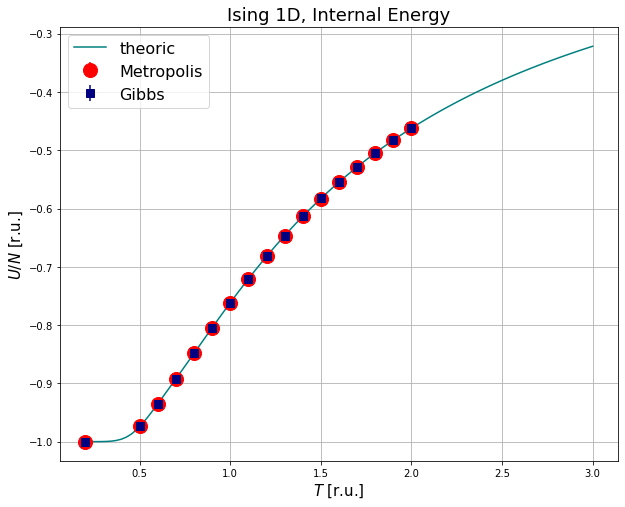

In [10]:
fig , ax = plt.subplots(1, 1, figsize=(10,8))
#Energy
ax.errorbar(temperature, energy, yerr = energy_err, label="Metropolis", marker='o', linestyle='none', color = "red" , markersize=14)
ax.errorbar(Gtemperature, Genergy, yerr = Genergy_err, label="Gibbs", marker='s', linestyle='none', color = "navy" , markersize=8)

#Theoric
ax.plot(T, e, label='theoric', color = "teal")

ax.set_title('Ising 1D, Internal Energy',  fontsize=18)
ax.set_xlabel(r'$T$ [r.u.]', fontsize=15)
ax.set_ylabel(r'$U/N$ [r.u.]', fontsize=15)
ax.legend(loc="best", prop={'size': 16})  
ax.grid()

### Heat Capacity

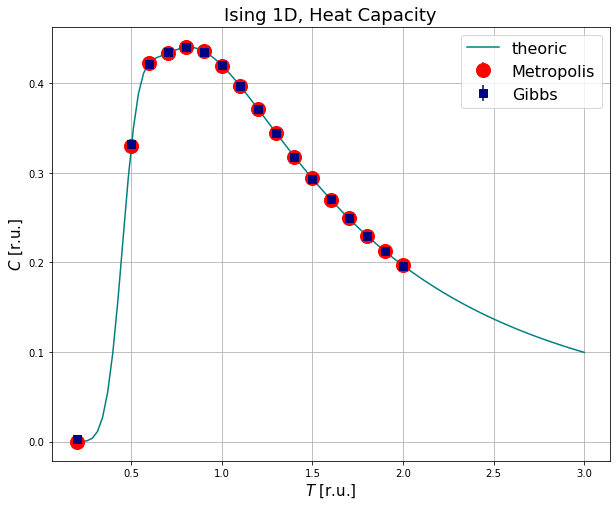

In [11]:
fig , ax = plt.subplots(1, 1, figsize=(10,8))
#Heat Capacity
ax.errorbar(temperature, hc, yerr = hc_err, label="Metropolis", marker='o', linestyle='none', color = "red" , markersize=14)
ax.errorbar(Gtemperature, Ghc, yerr = Ghc_err, label="Gibbs", marker='s', linestyle='none', color = "navy" , markersize=8)

#Theoric
ax.plot(T, heat, label='theoric', color = "teal")

ax.set_title('Ising 1D, Heat Capacity',  fontsize=18)
ax.set_xlabel(r'$T$ [r.u.]', fontsize=15)
ax.set_ylabel(r'$C$ [r.u.]', fontsize=15)
ax.legend(loc="best", prop={'size': 16})  
ax.grid()

### Magnetisation

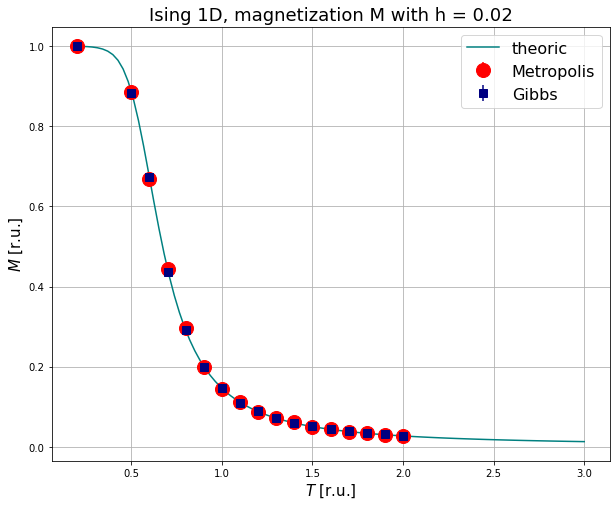

In [12]:
fig , ax = plt.subplots(1, 1, figsize=(10,8))
#Magnetic Susceptibility
ax.errorbar(temperature, mag, yerr = mag_err, label="Metropolis", marker='o', linestyle='none', color = "red" , markersize=14)
ax.errorbar(Gtemperature, Gmag, yerr = Gmag_err, label="Gibbs", marker='s', linestyle='none', color = "navy" , markersize=8)

#Theoric
ax.plot(T, M, label='theoric', color = "teal")

ax.set_title('Ising 1D, magnetization M with h = 0.02',  fontsize=18)
ax.set_xlabel(r'$T$ [r.u.]', fontsize=15)
ax.set_ylabel(r'$M$ [r.u.]', fontsize=15)
ax.legend(loc="best", prop={'size': 16})  
ax.grid()

### Magnetic Susceptibility

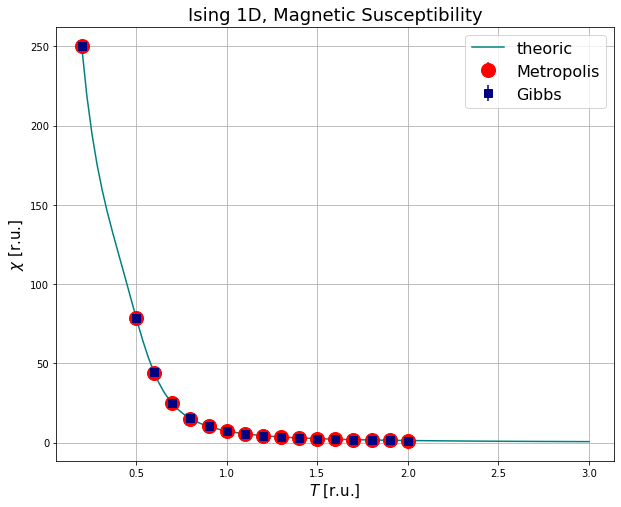

In [13]:
fig , ax = plt.subplots(1, 1, figsize=(10,8))
#Magnetic Susceptibility
ax.errorbar(temperature, sus, yerr = sus_err, label="Metropolis", marker='o', linestyle='none', color = "red" , markersize=14)
ax.errorbar(Gtemperature, Gsus, yerr = Gsus_err, label="Gibbs", marker='s', linestyle='none', color = "navy" , markersize=8)

#Theoric
ax.plot(T, X, label='theoric', color = "teal")

ax.set_title('Ising 1D, Magnetic Susceptibility',  fontsize=18)
ax.set_xlabel(r'$T$ [r.u.]', fontsize=15)
ax.set_ylabel(r'$\chi$ [r.u.]', fontsize=15)
ax.legend(loc="best", prop={'size': 16})  
ax.grid()

## Metropolis and Gibbs results comparison

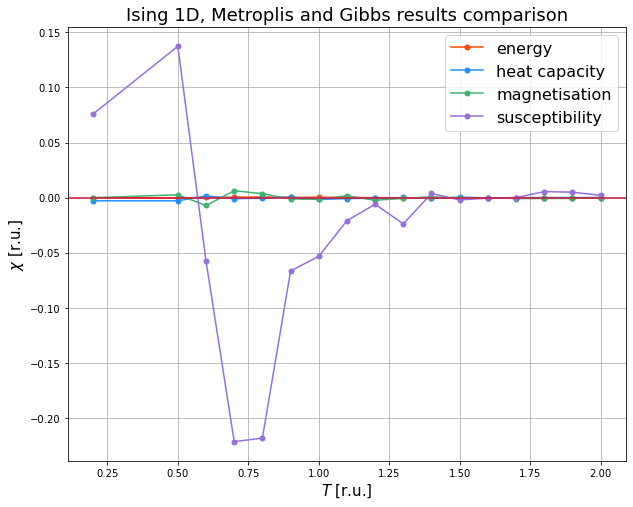

In [16]:
fig , ax = plt.subplots(1, 1, figsize=(10,8))
#Energy
ax.plot(temperature, energy-Genergy, label ="energy", marker=".", color="orangered", markersize=10)
ax.plot(temperature, hc-Ghc, label ="heat capacity", marker=".", color="dodgerblue", markersize=10)
ax.plot(temperature, mag-Gmag, label="magnetisation", marker='.', color = "mediumseagreen" , markersize=10)
ax.plot(temperature, sus-Gsus, label="susceptibility", marker='.', color = "mediumpurple" , markersize=10)

ax.set_title('Ising 1D, Metroplis and Gibbs results comparison',  fontsize=18)
ax.set_xlabel(r'$T$ [r.u.]', fontsize=15)
ax.set_ylabel(r'$\chi$ [r.u.]', fontsize=15)
ax.axhline(0, color ="crimson")
ax.legend(loc="best", prop={'size': 16})  
ax.grid()

I grafici mostrano la termodinamica di un modello di Ising 1D costituito da 50 spin. I risultati sono stati ottenuti con il procedimento di data blocking, utilizzando 30 blocchi, ognuno da $10^5$ step (con step si intende un tentativo di capovolgere singolarmente ognuno dei 50 spin che compongono il sistema) <br>
Per ogni grandezza sono graficati i valori teorici attesi e quelli simulati. Questi ultimi sono ottenuti con due metodi diversi: l'algoritmo di Metropolis e l'algoritmo di Gibbs. <br>
La differenza principale tra questi due metodi è che l'algoritmo di Metropolis propone un flip dello spin attuale e sceglie se eseguirlo a seconda della variazione dell'energia del reticolo. Al contrario, il passo proposto dall'algoritmo di Gibbs è indipendente dallo spin corrente, quindi la decisione presa è quale valore assegnare allo spin in modo da minimizzare l'energia del reticolo. Per questo motivo, le mosse proposte dall'algoritmo di Gibbs sono sempre accettate mentre è consuetudine scegliere un delta tale che l'algoritmo di Metropolis abbia un acceptance rate del $50\%$. <br>
Nonostante la differenza di metodo, vediamo che entrambi gli algoritmi si accordano ai dati teorici per ogni quantità e temperatura. Ciò è ancora più evidente nel grafico di paragone: le differenze nella Suscettività Magnetica sembrano marcate ma la differenza percentuale rimane simile tra le diverse quantità (per basse temperature $\chi$ è nell'ordina di $10^2$). <br>
Entrambi gli algoritmi sono stati utilizzati per calcolcare l'evoluzione del sistema alla temperatura $T=0.2\:r.u.$: per questa temperatura ho equilibrato il sistema con $10^3$ step e i risultati sono in accordo con i dati teorici. È da notare che, durante l'evoluzione del sistema equilibrato, l'algoritmo di Metropolis ha sempre avuto un accemptance rate pari a zero: questo perchè il sistema equilibrato a bassa temperatura ha spin tutti allineati e la probabilità di osservare uno spin flip è molto rara. <br>
